# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# API URL + adding API Key and defining units as Metric
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
units = "imperial"

# Store city data
lat = []
lon=[]
temp=[]
humidity=[] 
cloudy =[]
windspeed=[]
count=0
cityname=[]
dt=[]

query_url = f"{url}&units={units}&q="
query_url + city
response = requests.get(query_url + city).json()
response

  
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        cityname.append(response['name'])
        dt.append(response['dt'])
        count=count+1
        #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")

print(f"lat: {lat} {len(lat)}")
print(f"lon: {lon} {len(lon)}")
print(f"temp: {temp} {len(temp)}")
print(f"humidity: {humidity} {len(humidity)}")
print(f"clouds: {cloudy} {len(cloudy)}")
print(f"wind speed: {windspeed} {len(windspeed)}")
print(f"date: {dt} {len(dt)}")
print(f"cityname: {cityname} {len(cityname)}")

City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
City not found. Skip

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df = {"city":cityname,"latitude":lat,"longitude":lon,"date":dt,"temperature": temp,"humidity":humidity,"cloudiness":cloudy,"windspeed":windspeed}
weather_df = pd.DataFrame(weather_df)
weather_df.to_csv(output_data_file)
weather_df

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/cities.csv'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

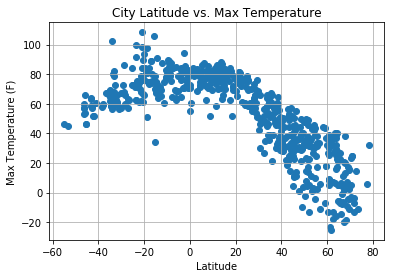

In [5]:
plt.scatter(weather_df["latitude"], weather_df["temperature"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatVsMaxTemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

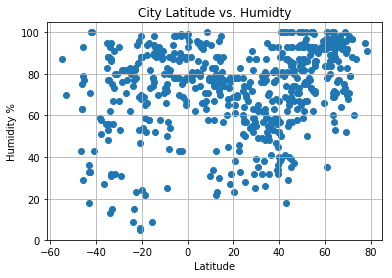

In [6]:
# Build a scatter plot for each data type
plt.scatter(weather_df["latitude"], weather_df["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidty")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatVsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

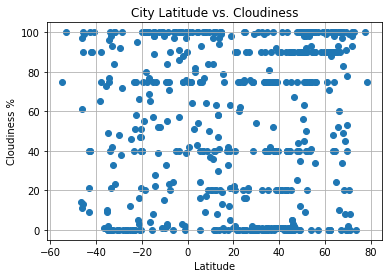

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_df["latitude"], weather_df["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatVsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

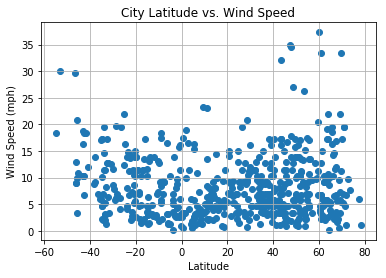

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_df["latitude"], weather_df["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CityLatVsWindSpeed.png")

# Show plot
plt.show()